<a href="https://colab.research.google.com/github/vrishank-ramineni/ECON3916---Statistics-Machine-Learning/blob/main/%5BClass%202%5D/Lab_2_Fred_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install fredapi

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred

# Authenticate
# Replace the string below with YOUR unique API key from fred.stlouisfed.org
fred = Fred(api_key=)

In [9]:
# 1. Fetch the data series
print("Fetching data from FRED...")
wages = fred.get_series('AHETPI')
cpi = fred.get_series('CPIAUCSL')

# 2. Combine into a DataFrame
df = pd.DataFrame({'Nominal_Wage': wages, 'CPI': cpi})

# 3. Drop missing values (The wage data starts later than CPI data)
df = df.dropna()

# Inspect the raw data
print(df.head())
print(df.tail())

Fetching data from FRED...
            Nominal_Wage    CPI
1964-01-01          2.50  30.94
1964-02-01          2.50  30.91
1964-03-01          2.51  30.94
1964-04-01          2.52  30.95
1964-05-01          2.52  30.98
            Nominal_Wage      CPI
2025-07-01         31.35  322.132
2025-08-01         31.45  323.364
2025-09-01         31.52  324.368
2025-11-01         31.73  325.031
2025-12-01         31.76  326.030


In [10]:
def get_real_wage(nominal_col, cpi_col):
    """
    Takes a nominal column and a CPI column.
    Returns a new column adjusted for inflation (Real Dollars).
    """
    # 1. Get the CPI of the most recent date (Today's Prices)
    # .iloc[-1] grabs the very last row in the data
    cpi_today = cpi_col.iloc[-1]

    # 2. The Formula: (Nominal / Old_CPI) * CPI_Today
    real_col = (nominal_col / cpi_col) * cpi_today

    return real_col

# Apply the function to create a new column
# We feed the "Machine" our two columns:
df['Real_Wage'] = get_real_wage(df['Nominal_Wage'], df['CPI'])

# Check the result - Notice how Real Wages are different from Nominal!
print(df.tail())

            Nominal_Wage      CPI  Real_Wage
2025-07-01         31.35  322.132  31.729355
2025-08-01         31.45  323.364  31.709292
2025-09-01         31.52  324.368  31.681502
2025-11-01         31.73  325.031  31.827524
2025-12-01         31.76  326.030  31.760000


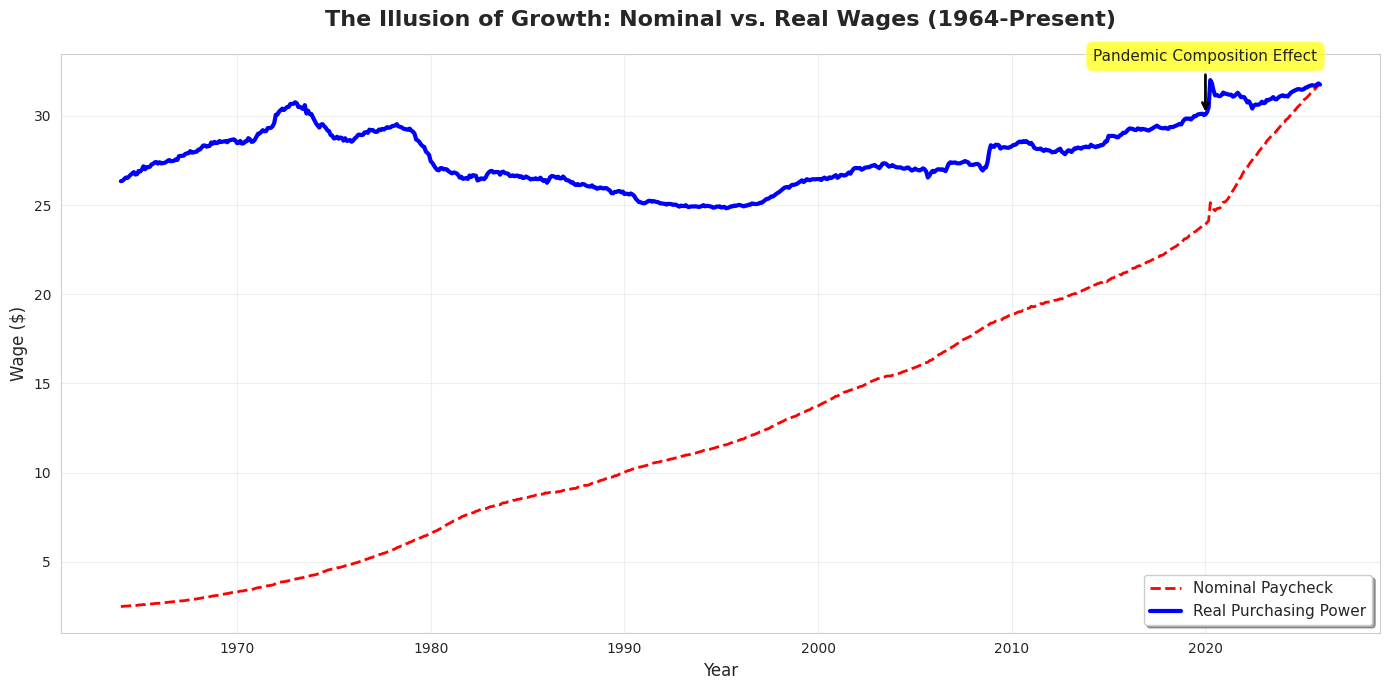

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set the style
sns.set_style("whitegrid")
plt.figure(figsize=(14, 7))

# Plot both wage series
plt.plot(df.index, df['Nominal_Wage'],
         color='red',
         linestyle='--',
         linewidth=2,
         label='Nominal Paycheck')

plt.plot(df.index, df['Real_Wage'],
         color='blue',
         linewidth=3,
         label='Real Purchasing Power')

# Add title and labels
plt.title('The Illusion of Growth: Nominal vs. Real Wages (1964-Present)',
          fontsize=16,
          fontweight='bold',
          pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Wage ($)', fontsize=12)

# Add annotation for 2020 pandemic spike
# Filter for 2020 data (handles datetime index properly)
mask_2020 = df.index.year == 2020
if mask_2020.any():
    pandemic_index = df.index[mask_2020][0]  # Get first 2020 date
    pandemic_value = df.loc[pandemic_index, 'Real_Wage']

    plt.annotate('Pandemic Composition Effect',
                 xy=(pandemic_index, pandemic_value),
                 xytext=(pandemic_index, pandemic_value * 1.1),
                 arrowprops=dict(arrowstyle='->',
                               color='black',
                               lw=2),
                 fontsize=11,
                 ha='center',
                 bbox=dict(boxstyle='round,pad=0.5',
                          facecolor='yellow',
                          alpha=0.7))

# Add legend
plt.legend(loc='best', fontsize=11, frameon=True, shadow=True)

# Improve layout
plt.tight_layout()
plt.grid(True, alpha=0.3)

# Display the plot
plt.show()

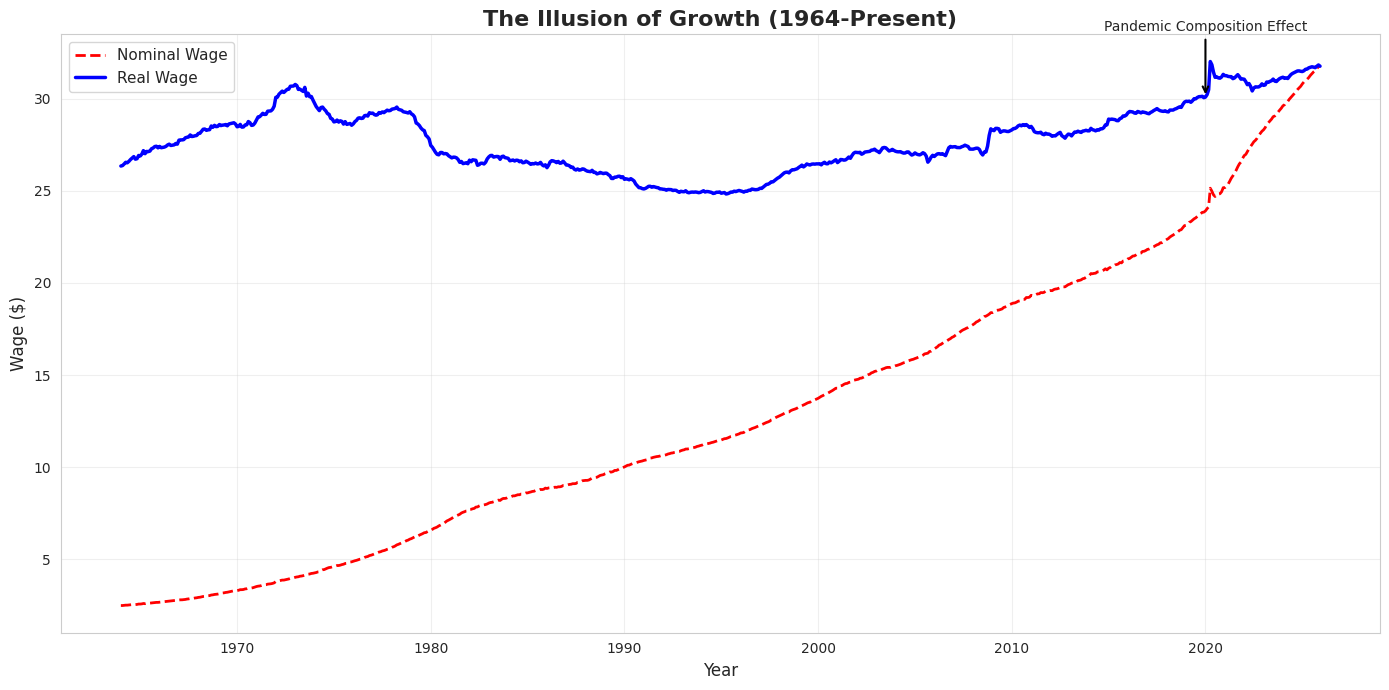

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Create the figure
plt.figure(figsize=(14, 7))

# Plot both wage series
plt.plot(df.index, df['Nominal_Wage'],
         color='red',
         linestyle='--',
         linewidth=2,
         label='Nominal Wage')

plt.plot(df.index, df['Real_Wage'],
         color='blue',
         linewidth=2.5,
         label='Real Wage')

# Add title and labels
plt.title('The Illusion of Growth (1964-Present)',
          fontsize=16,
          fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Wage ($)', fontsize=12)

# Annotate the 2020 pandemic spike
# Find the 2020 data point
mask_2020 = df.index.year == 2020
if mask_2020.any():
    pandemic_date = df.index[mask_2020][0]
    pandemic_value = df.loc[pandemic_date, 'Real_Wage']

    plt.annotate('Pandemic Composition Effect',
                 xy=(pandemic_date, pandemic_value),
                 xytext=(pandemic_date, pandemic_value * 1.12),
                 arrowprops=dict(arrowstyle='->',
                               color='black',
                               lw=1.5),
                 fontsize=10,
                 ha='center')

# Add legend and grid
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()

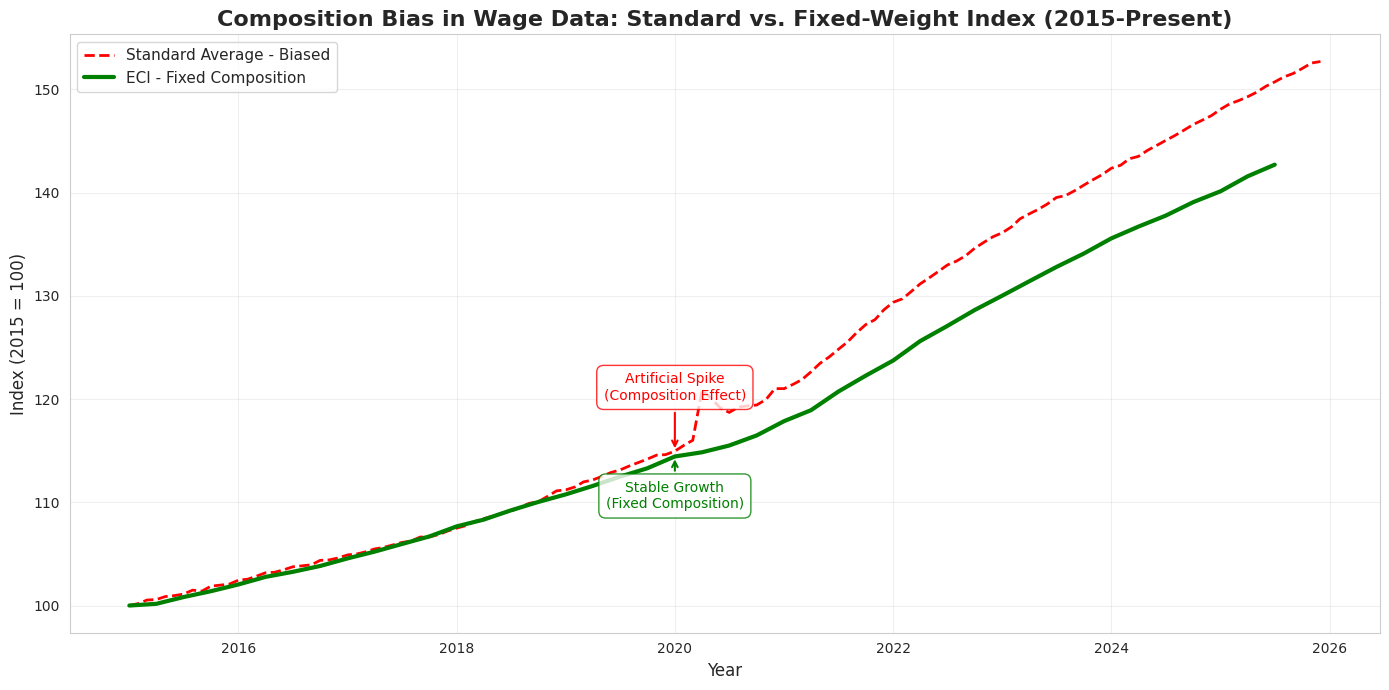

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Fetch the Employment Cost Index data
eciwag = fred.get_series('ECIWAG')

# 2. Filter both series to 2015-01-01 onwards
wages_filtered = wages[wages.index >= '2015-01-01']
eciwag_filtered = eciwag[eciwag.index >= '2015-01-01']

# 3. Rebase both series to 100 (first value = 100)
wages_rebased = (wages_filtered / wages_filtered.iloc[0]) * 100
eciwag_rebased = (eciwag_filtered / eciwag_filtered.iloc[0]) * 100

# 4. Create the plot
plt.figure(figsize=(14, 7))

plt.plot(wages_rebased.index, wages_rebased,
         color='red',
         linestyle='--',
         linewidth=2,
         label='Standard Average - Biased')

plt.plot(eciwag_rebased.index, eciwag_rebased,
         color='green',
         linewidth=3,
         label='ECI - Fixed Composition')

# Add title and labels
plt.title('Composition Bias in Wage Data: Standard vs. Fixed-Weight Index (2015-Present)',
          fontsize=16,
          fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Index (2015 = 100)', fontsize=12)

# 5. Annotate the 2020 divergence
# Find 2020 data points
mask_2020 = wages_rebased.index.year == 2020
if mask_2020.any():
    date_2020 = wages_rebased.index[mask_2020][0]

    # Get values for both series at 2020
    wages_2020 = wages_rebased.loc[date_2020]
    eciwag_2020 = eciwag_rebased.loc[date_2020]

    # Annotate the artificial spike in standard wages
    plt.annotate('Artificial Spike\n(Composition Effect)',
                 xy=(date_2020, wages_2020),
                 xytext=(date_2020, wages_2020 + 5),
                 arrowprops=dict(arrowstyle='->',
                               color='red',
                               lw=1.5),
                 fontsize=10,
                 ha='center',
                 color='red',
                 bbox=dict(boxstyle='round,pad=0.5',
                          facecolor='white',
                          edgecolor='red',
                          alpha=0.8))

    # Annotate the stable growth in ECI
    plt.annotate('Stable Growth\n(Fixed Composition)',
                 xy=(date_2020, eciwag_2020),
                 xytext=(date_2020, eciwag_2020 - 5),
                 arrowprops=dict(arrowstyle='->',
                               color='green',
                               lw=1.5),
                 fontsize=10,
                 ha='center',
                 color='green',
                 bbox=dict(boxstyle='round,pad=0.5',
                          facecolor='white',
                          edgecolor='green',
                          alpha=0.8))

# Add legend and grid
plt.legend(fontsize=11, loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()